# 3D mae可视化结果

In [1]:
#3d dataloader
from util.ccdataset3d import *
train_paths, valid_paths, test_paths = getPathList()
train_loader, valid_loader, test_loader = getDataloader(
    train_paths, valid_paths, test_paths, B1=1)
len(train_loader),len(valid_loader),len(test_loader)
#(1,1,160,224,224)

(274, 29, 56)

In [2]:
import torch
import model_mae3d

model_str = 'mae3d_vit_stride4_patch16'
device = torch.device('cuda:0')
model = model_mae3d.__dict__[model_str](
        num_frames=int(32), norm_pix_loss=False)
checkpoint = torch.load('/data/zhanghao/skull_project/mae-main/out_base_stride4_dir/checkpoint-399.pth',map_location='cpu')
checkpoint_model = checkpoint['model']
msg = model.load_state_dict(checkpoint_model,strict =False)
print(msg)



KeyError: 'mae3d_vit_stride4_patch16'

In [3]:
import itertools
data = next(itertools.islice(train_loader, 0, None))
image = data["image"]
mask = data["mask"]
image.shape,image.dtype,image.max(),image.min(),mask.max(),mask.min()

(torch.Size([1, 1, 160, 224, 224]),
 torch.float32,
 tensor(0.9470),
 tensor(0.),
 tensor(1.),
 tensor(0.))

In [6]:
# image.to(device)
# model.to(device)
_,pred,_ = model(image)
pred.shape
pred = model.unpatchify3D(pred)
pred.shape

torch.Size([1, 1, 32, 224, 224])

In [7]:

print(pred.max(),pred.min())

tensor(0.7938, grad_fn=<MaxBackward1>) tensor(-0.2804, grad_fn=<MinBackward1>)


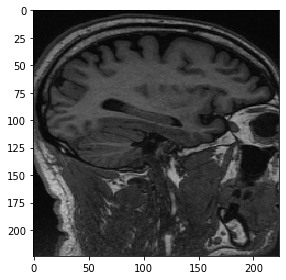

torch.Size([224, 224]) torch.Size([1, 1, 160, 224, 224])


In [33]:
import skimage
import skimage.io
from skimage import img_as_ubyte
img = image[0][0][0:160][0:160][110]
skimage.io.imshow(img_as_ubyte(img))
import matplotlib.pyplot as plt
plt.show()
print(img.shape,image.shape)

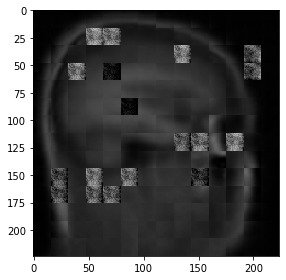

: 

In [10]:

predict = pred[0][0][16]
predict = predict.detach().numpy()
skimage.io.imshow(img_as_ubyte(predict))
import matplotlib.pyplot as plt
plt.show()

In [8]:
x = model.patch_embed(image)
x.shape

torch.Size([1, 3920, 1024])

# 2D mae可视化结果

In [8]:
#2d dataloader
from util.ccdataset3d import *
train_paths, valid_paths, test_paths = getPathList()
train_loader, valid_loader, test_loader = getDataloader(
    train_paths, valid_paths, test_paths, B1=1,pin=False)
len(train_loader),len(valid_loader),len(test_loader)
# torch.Size([64, 1, 224, 224]) torch.FloatTensor


(274, 43, 42)

In [15]:
import torch
import models_mae

model_str = 'mae_vit_768_128_6_patch16'
device = torch.device('cuda:1')
model = models_mae.__dict__[model_str](norm_pix_loss=False)
checkpoint = torch.load('/data/zhanghao/skull_project/mae-main/oasis_cc359_half_pretrain_out_norm/checkpoint-399.pth',map_location='cpu')
checkpoint_model = checkpoint['model']
msg = model.load_state_dict(checkpoint_model,strict =False)
print(msg)
 

<All keys matched successfully>


In [16]:
import itertools
data = next(itertools.islice(valid_loader, 0, None))
image = data["image"][:,:,80,:,:]
mask = data["mask"]
image.shape,image.dtype,image.max(),image.min(),mask.max(),mask.min()

(torch.Size([1, 1, 224, 224]),
 torch.float32,
 tensor(0.9709),
 tensor(0.),
 tensor(1.),
 tensor(0.))

In [17]:
_,pred,_ = model(image)
pred.shape
pred = model.unpatchify(pred)
pred.shape

torch.Size([1, 1, 224, 224])

In [19]:
pred = (pred-pred.min())/(pred.max()-pred.min())
print(pred.max(),pred.min())

tensor(1., grad_fn=<MaxBackward1>) tensor(0., grad_fn=<MinBackward1>)


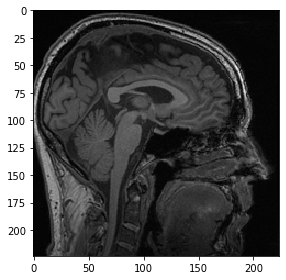

torch.Size([224, 224])


In [20]:
import skimage
import skimage.io
from skimage import img_as_ubyte
img = image[0][0]
skimage.io.imshow(img_as_ubyte(img))
import matplotlib.pyplot as plt
plt.show()
print(img.shape)

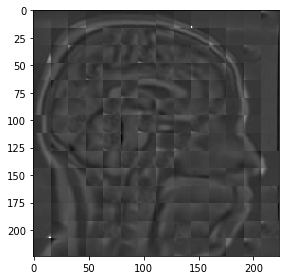

In [21]:

predict = pred[0][0]
predict = predict.detach().numpy()
skimage.io.imshow(img_as_ubyte(predict))
import matplotlib.pyplot as plt
plt.show()